In [1]:
# 라이브러리 추가
import numpy as np
import pandas as pd
import re
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# 키워드
df = pd.read_excel('D:/GEODATA/kakao_blog_cafe.xlsx', sheet_name='Sheet1',
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)
df[['title']].to_csv('D:/GEODATA/kakao_blog_cafe.txt', index=False, header=False)
f = open("D:/GEODATA/kakao_blog_cafe.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [4]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(kkma.nouns(lines[i]))
word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

In [5]:
# 단어 1차원 리스트 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

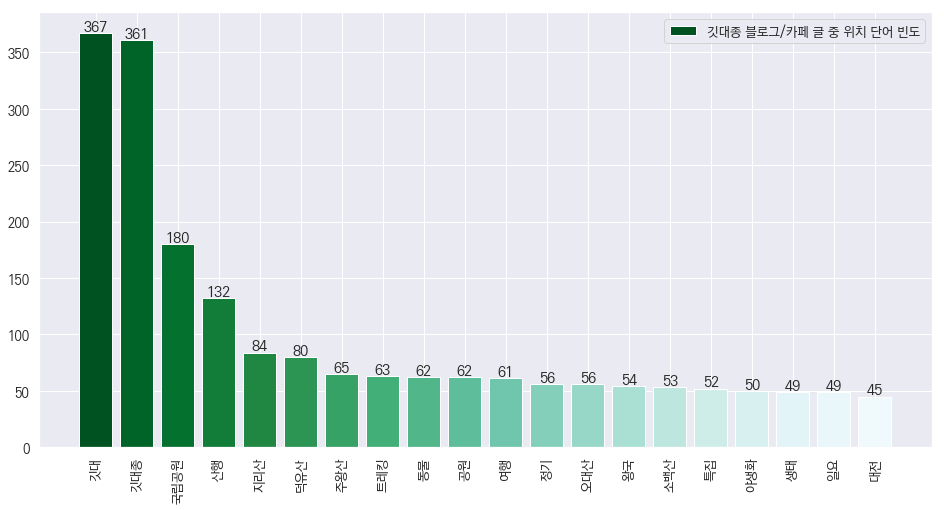

In [7]:
# 단어빈도
df = pd.DataFrame({'단어':flatten(word)})
value_counts = df['단어'].value_counts(dropna=True, sort=True)
df = pd.DataFrame(value_counts).reset_index()
df.columns = ['단어', '빈도']
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df[:20]['단어'], df[:20]['빈도'], color=sns.color_palette("BuGn_r", df[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df[:20]['단어'], rotation='vertical') 
plt.legend(labels=['깃대종 블로그/카페 글 중 위치 단어 빈도'], loc='upper right')
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

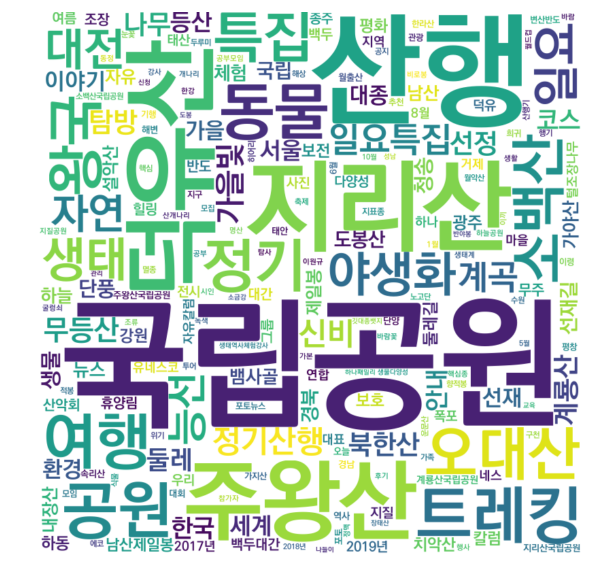

In [8]:
# 위치 단어구름
from wordcloud import WordCloud
from collections import Counter

font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(flatten(word))

stopwords = ["깃대종", "깃대"]
[count.pop(stopword) for stopword in stopwords]

wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')
plt.show()

In [11]:
# 어프라이어리(Apriori)
from apyori import apriori
# 지지도(support): P(A∩B)
result=(list(apriori(word, min_support=0.01)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
                  (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(20)

,items,support,ordered_statistics,length
87,"(깃대, 깃대종)",0.228745,"[((깃대), (깃대종), 0.9237057220708447, 3.792055069...",2
83,"(국립공원, 깃대)",0.051957,"[((국립공원), (깃대), 0.42777777777777776, 1.7274296...",2
84,"(국립공원, 깃대종)",0.046559,"[((국립공원), (깃대종), 0.38333333333333336, 1.573684...",2
106,"(동물, 왕국)",0.036437,"[((동물), (왕국), 0.8709677419354838, 23.903225806...",2
115,"(정기, 산행)",0.035088,"[((산행), (정기), 0.3939393939393939, 10.425324675...",2
127,"(왕국, 특집)",0.033738,"[((왕국), (특집), 0.9259259259259259, 26.388888888...",2
109,"(동물, 특집)",0.033738,"[((동물), (특집), 0.8064516129032258, 22.983870967...",2
107,"(동물, 일요)",0.032389,"[((동물), (일요), 0.7741935483870968, 23.415404871...",2
129,"(특집, 일요)",0.032389,"[((일요), (특집), 0.9795918367346939, 27.918367346...",2
125,"(왕국, 일요)",0.032389,"[((왕국), (일요), 0.888888888888889, 26.8843537414...",2


In [12]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

# 레이아웃
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)

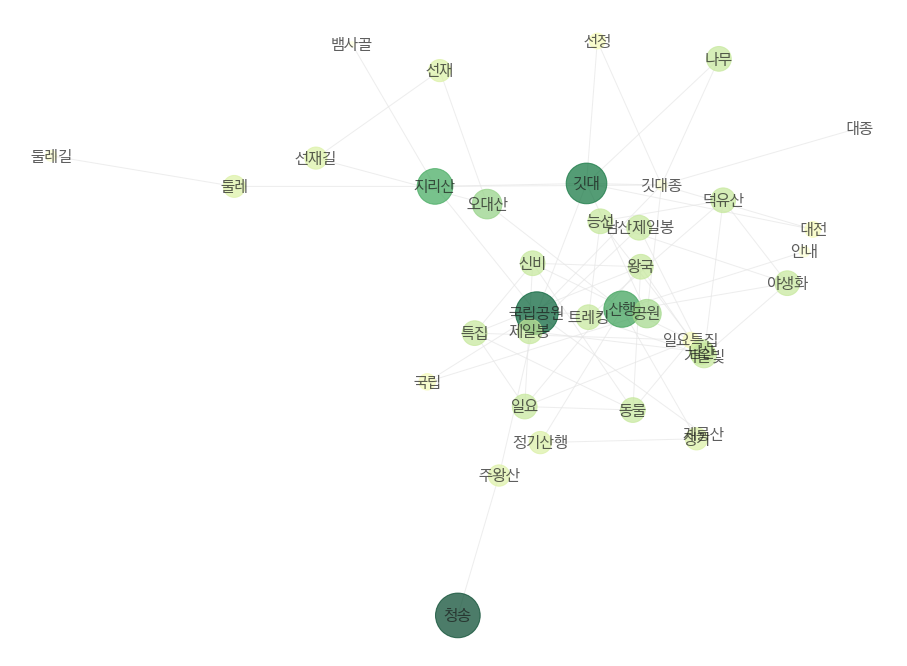

In [13]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.9', cmap=plt.cm.YlGn)
plt.savefig('D:/GEODATA/IMG03.png', bbox_inches='tight')